# IMPORT STATEMENTS

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
plt.style.use("fast")
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.graph_objs as go

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA

import random
import statistics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# DATA UNDERSTANDING

In [ ]:
datasetPath = '/content/drive/MyDrive/UNIPI/DM1/DATASET: Spotify/train.csv'
data = pd.read_csv(datasetPath)

data.head(3)

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,liveness,valence,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre
0,Long Road,241760,False,46,Funki Porcini,Hed Phone Sex,0.690,0.513,5,-12.529,...,0.281,0.6350,142.221,241760,4.0,567.0,141.0,NaN,1.279305,j-dance
1,"Daniâl My Son, Where Did You Vanish?",444000,False,0,Siavash Amini,A Trail of Laughters,0.069,0.196,1,-24.801,...,0.360,0.0336,75.596,444000,4.0,617.0,155.0,NaN,2.367412,iranian
2,Ondskapens Galakse,333506,False,3,Kvelertak,Nattesferd,0.363,0.854,2,-7.445,...,0.262,0.4890,116.628,333507,4.0,652.0,162.0,NaN,3.700483,black-metal


Column description

- name: 			Name of the track
- duration_ms: 			The track length in milliseconds
- explicit: 			Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- popularity: 			The popularity of a track is a value between 0 and 100, with 100 being the most popular.
- artists: 			The artists' names who performed the track. If there is more than one artist, they are separated by a ;
- album_name: 	 		The album name in which the track appears
- danceability: 		Danceability describes how suitable a track is for dancing. A value of 0.0 is least danceable and 1.0 is most danceable    
- energy: 			Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
- key:				The key the track is in. Integers map to pitches using standard Pitch Class notation.
- loudness: 			The overall loudness of a track in decibels (dB)
- mode:				Mode indicates the modality (major or minor) of a track. Major is represented by 1 and minor is 0
- speechiness: 			Speechiness detects the presence of spoken words in a track.
- acousticness:			A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- instrumentalness:		Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0
- liveness:			Detects the presence of an audience in the recording.
- valence:			A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
- tempo:			The overall estimated tempo of a track in beats per minute (BPM).
- features_duration_ms: 	The duration of the track in milliseconds
- time_signature:		An estimated time signature.
- n_beats:			The total number of time intervals of beats throughout the track.
- n_bars:			The total number of time intervals of the bars throughout the track.
- popularity_confidence: 	The confidence, from 0.0 to 1.0, of the popularity of the song.
- genre:			The genre in which the track belongs



In [ ]:
print("-------------------------- SHAPE -----------------------")
print(data.shape, f"-> {data.shape[0]} records and {data.shape[1]} features")
print("-------------------------- INFO ------------------------")
print(data.info())

-------------------------- SHAPE -----------------------
(15000, 24) -> 15000 records and 24 features
-------------------------- INFO ------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   15000 non-null  object 
 1   duration_ms            15000 non-null  int64  
 2   explicit               15000 non-null  bool   
 3   popularity             15000 non-null  int64  
 4   artists                15000 non-null  object 
 5   album_name             15000 non-null  object 
 6   danceability           15000 non-null  float64
 7   energy                 15000 non-null  float64
 8   key                    15000 non-null  int64  
 9   loudness               15000 non-null  float64
 10  mode                   10550 non-null  float64
 11  speechiness            15000 non-null  float64
 12 

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,15000,15000,Long Road,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_ms,15000.0,NaN,NaN,NaN,246807.480133,127994.054826,8586.0,180000.0,227826.0,288903.0,4120258.0
explicit,15000,2,False,14034,NaN,NaN,NaN,NaN,NaN,NaN,NaN
popularity,15000.0,NaN,NaN,NaN,27.423667,18.587534,0.0,14.0,24.0,42.0,94.0
artists,15000,6257,Vybz Kartel,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
album_name,15000,9820,The Hardcore Archive Part 3 (1997),32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability,15000.0,NaN,NaN,NaN,0.551063,0.194239,0.0,0.441,0.58,0.695,0.98
energy,15000.0,NaN,NaN,NaN,0.656231,0.264371,0.0,0.48,0.709,0.884,1.0
key,15000.0,NaN,NaN,NaN,5.287867,3.585023,0.0,2.0,5.0,8.0,11.0
loudness,15000.0,NaN,NaN,NaN,-8.894999,6.005799,-49.531,-10.63625,-7.303,-5.101,3.156


In [ ]:
# Subset of columns based on dtype
int_subset = data.select_dtypes(include=['int'])
float_subset = data.select_dtypes(include=['float'])
bool_subset = data.select_dtypes(include=['bool'])
object_subset = data.select_dtypes(include=['object'])

subsets = {"int" : int_subset, "float": float_subset, "bool": bool_subset, "object" : object_subset}

for t, subset in subsets.items():
    print(f"Type {t} Features:")
    print(subset.columns.tolist())
    print("\n")

Type int Features:
['duration_ms', 'popularity', 'key', 'features_duration_ms']


Type float Features:
['danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'n_beats', 'n_bars', 'popularity_confidence', 'processing']


Type bool Features:
['explicit']


Type object Features:
['name', 'artists', 'album_name', 'genre']




Type OBJECT:
- Column `'name'` (string) has a number of unique values equal to the size of the dataset (which is to be expected given that it represents the column with track titles);
- Columns `'artists'`, `'album_name'` and `'genre'`: number of unique values is lower than the number of tracks, leading us to think that, in the dataset, there are multiple songs of the same artist, multiple songs in the same album and multiple songs of the same genre.

Type BOOL:
- We can see a strong imbalance between the two classes (`True`) and (`False`), with greater presence (about 93%) of non-explicit (or unknown explicity) songs.

Type INT:
- Columns `'duration_ms'` and `'features_duration_ms'` have the same values? *(checked below)*;
- Column `'popularity'`: ???
- Column `'key'`: this is clearly a categorical variable, checked below with distributions; we'll compute the mode subsequently.

Type FLOAT:
- Columns `danceability`,
- Column `'mode'` should be of type `'bool'`
- Column `'time_signature'` should be of type `'int'`

??? (other info deduced)

In [ ]:
# Creating a copy of the dataset
df = data.copy()

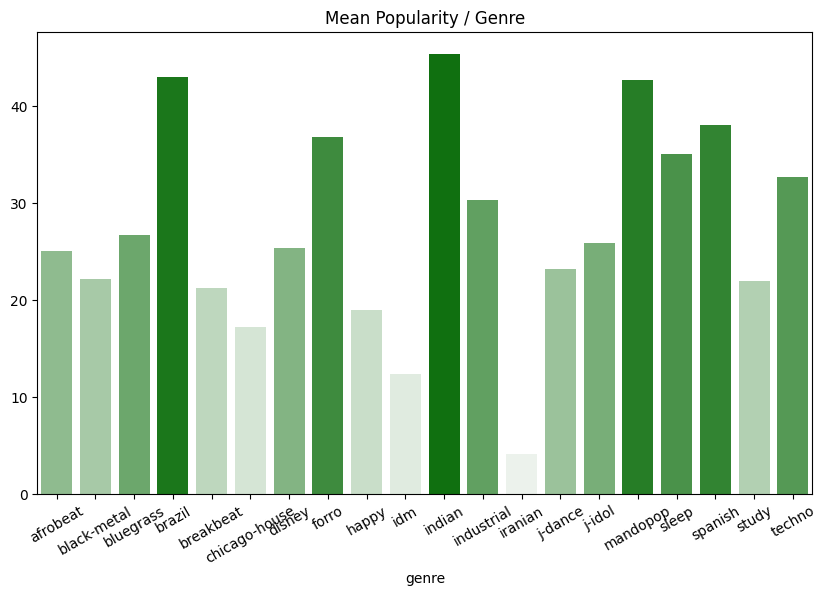

In [ ]:
popularity_mean = df.groupby('genre')['popularity'].mean()

plt.figure(figsize=(10,6))

cmap = sns.light_palette("green", as_cmap=True)
rank = popularity_mean.argsort().argsort()
sns.barplot(x=popularity_mean.index, y=popularity_mean.values, palette=np.array(cmap(rank / float(max(rank)))))

plt.xticks(rotation=30)
plt.title('Mean Popularity / Genre')
plt.show()

## Distibution of variables and statistics

In [ ]:
continuous_vars = [
    'duration_ms', 'popularity', 'features_duration_ms',
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
    'n_beats', 'n_bars', 'popularity_confidence', 'processing'
]

categorical_vars = [
    'key', 'mode', 'explicit', 'time_signature','genre'
]

name_vars = ['name', 'artists', 'album_name']

In [ ]:
# CONTINUOUS
df[continuous_vars].describe().T

,count,mean,std,min,25%,50%,75%,max
duration_ms,15000.0,246807.480133,127994.054826,8586.000000,180000.000000,227826.000000,288903.000000,4.120258e+06
popularity,15000.0,27.423667,18.587534,0.000000,14.000000,24.000000,42.000000,9.400000e+01
features_duration_ms,15000.0,246794.683533,127984.991272,8587.000000,180000.000000,227818.500000,288903.000000,4.120258e+06
danceability,15000.0,0.551063,0.194239,0.000000,0.441000,0.580000,0.695000,9.800000e-01
energy,15000.0,0.656231,0.264371,0.000000,0.480000,0.709000,0.884000,1.000000e+00
loudness,15000.0,-8.894999,6.005799,-49.531000,-10.636250,-7.303000,-5.101000,3.156000e+00
speechiness,15000.0,0.083779,0.086709,0.000000,0.037300,0.051000,0.088600,9.390000e-01
acousticness,15000.0,0.303896,0.329536,0.000000,0.009745,0.155000,0.573000,9.960000e-01
instrumentalness,15000.0,0.286734,0.382930,0.000000,0.000000,0.003130,0.744000,1.000000e+00
liveness,15000.0,0.216790,0.195295,0.000000,0.097900,0.131000,0.280000,9.940000e-01


In [ ]:
df['duration_min'] = df['duration_ms'] / 60000
df['features_duration_min'] = df['features_duration_ms'] / 60000

In [ ]:
from scipy.stats import kurtosis, skew

# Initialize an empty dictionary to store the results
results = {'Variable': [], 'Excess Kurtosis': [], 'Skewness': []}

for f in df.select_dtypes(include=['float']):
    # Append the results to the dictionary
    results['Variable'].append(f)
    results['Excess Kurtosis'].append(kurtosis(df[f]))
    results['Skewness'].append(skew(df[f]))

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Print the DataFrame
print(results_df)

                 Variable  Excess Kurtosis  Skewness
0            danceability        -0.135625 -0.622180
1                  energy        -0.467974 -0.680287
2                loudness         5.277946 -2.022171
3                    mode              NaN       NaN
4             speechiness        13.457845  3.120422
5            acousticness        -0.877248  0.760549
6        instrumentalness        -1.223635  0.776795
7                liveness         4.136971  2.067968
8                 valence        -1.096743  0.200110
9                   tempo         0.425752 -0.119907
10         time_signature              NaN       NaN
11                n_beats        75.430127  4.609279
12                 n_bars        91.274810  5.294170
13  popularity_confidence              NaN       NaN
14             processing        -1.511411  0.272359
15           duration_min       161.503328  7.739920
16  features_duration_min       161.552645  7.741549


In [ ]:
# Replace categorical variables
'''def categorical_to_numeric(data, columns):
  for col in columns:
    col_dict = {feature: i for i, feature in enumerate(data[col].unique())}
    data[col] = data[col].map(col_dict)
  return data'''

def categorical_to_numeric(data, columns):
  column_dicts = {}
  inverse_column_dicts = {}
  for col in columns:
    col_dict = {feature: i for i, feature in enumerate(data[col].unique())}
    inverse_col_dict = {i: feature for i, feature in enumerate(data[col].unique())}
    data[col] = data[col].map(col_dict)
    column_dicts[col] = col_dict
    inverse_column_dicts[col] = inverse_col_dict
  return data, column_dicts, inverse_column_dicts

categorical_columns = list(object_subset.columns)
df, column_dicts, inverse_column_dicts = categorical_to_numeric(df, categorical_columns)

import pickle

# Salva il dizionario inverso su disco
with open('/content/drive/MyDrive/UNIPI/DM1/DATASET: Spotify/DM1 - Project/files/inverse_column_dicts.pkl', 'wb') as f:
    pickle.dump(inverse_column_dicts, f)

df['explicit'] = [int(x) for x in df['explicit']] # bool->int (binary)
df['key'] = [int(x) for x in df['key']] # float -> int

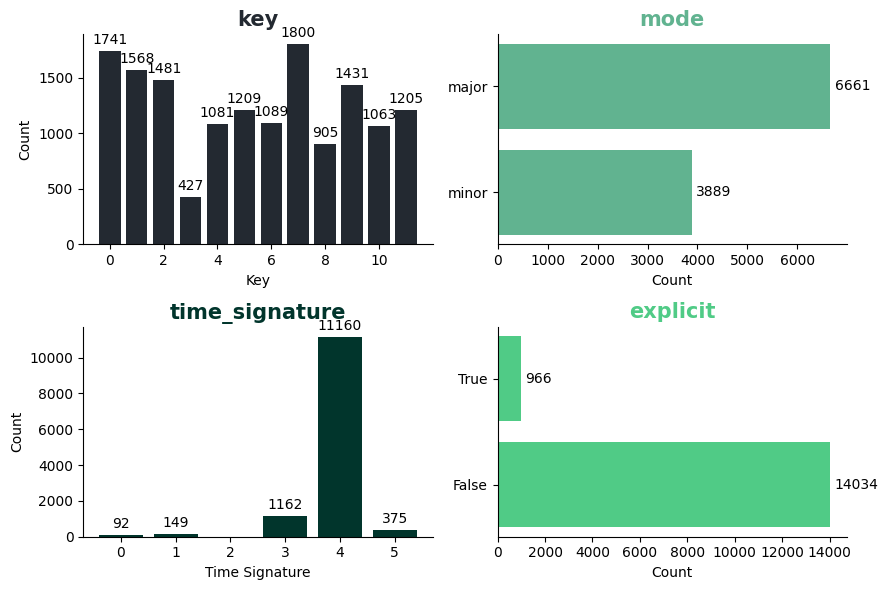

In [ ]:
colors = ['#232931', '#61b390', '#01352c', '#50cb86']

fig = plt.figure(figsize=(9, 6))

# Plot for 'key'
count_key = df['key'].value_counts()
ax1 = plt.subplot2grid((2, 2), (0, 0))
bars1 = ax1.bar(count_key.index, count_key.values, color=colors[0])
ax1.set_title('key', fontweight='bold', color = colors[0], fontsize='15')
ax1.set_xlabel('Key')
ax1.set_ylabel('Count')

# Plot for 'mode'
binary_mode = df['mode'].value_counts()
ax2 = plt.subplot2grid((2, 2), (0, 1))
bars2 = ax2.barh(binary_mode.index, binary_mode.values, color=colors[1])
ax2.set_title('mode', fontweight='bold', color = colors[1], fontsize='15')
ax2.set_xlabel('Count')
ax2.set_yticks([0, 1])
ax2.set_yticklabels(['minor', 'major'])

# Plot for 'time_signature'
count_time_signature = df['time_signature'].value_counts()
ax3 = plt.subplot2grid((2, 2), (1, 0))
bars3 = ax3.bar(count_time_signature.index, count_time_signature.values, color=colors[2])
ax3.set_title('time_signature', fontweight='bold', color = colors[2], fontsize='15')
ax3.set_xlabel('Time Signature')
ax3.set_ylabel('Count')

# Plot for 'explicit'
binary_explicit = df['explicit'].value_counts()
ax4 = plt.subplot2grid((2, 2), (1, 1))
bars4 = ax4.barh(binary_explicit.index, binary_explicit.values, color=colors[3])
ax4.set_title('explicit', fontweight='bold', color = colors[3], fontsize='15')
ax4.set_xlabel('Count')
ax4.set_yticks([0, 1])
ax4.set_yticklabels(['False', 'True'])

for ax in [ax1,ax2,ax3,ax4]:
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

# Add counts on top of the bars
for bar in bars1:
    height = bar.get_height()
    ax1.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

for bar in bars2:
    width = bar.get_width()
    ax2.annotate('{}'.format(width),
                 xy=(width, bar.get_y() + bar.get_height() / 2),
                 xytext=(3, 0),  # 3 points horizontal offset
                 textcoords="offset points",
                 ha='left', va='center')

for bar in bars3:
    height = bar.get_height()
    ax3.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

for bar in bars4:
    width = bar.get_width()
    ax4.annotate('{}'.format(width),
                 xy=(width, bar.get_y() + bar.get_height() / 2),
                 xytext=(3, 0),  # 3 points horizontal offset
                 textcoords="offset points",
                 ha='left', va='center')

plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   15000 non-null  int64  
 1   duration_ms            15000 non-null  int64  
 2   explicit               15000 non-null  int64  
 3   popularity             15000 non-null  int64  
 4   artists                15000 non-null  int64  
 5   album_name             15000 non-null  int64  
 6   danceability           15000 non-null  float64
 7   energy                 15000 non-null  float64
 8   key                    15000 non-null  int64  
 9   loudness               15000 non-null  float64
 10  mode                   10550 non-null  float64
 11  speechiness            15000 non-null  float64
 12  acousticness           15000 non-null  float64
 13  instrumentalness       15000 non-null  float64
 14  liveness               15000 non-null  float64
 15  va

In [ ]:
df.head()

,name,duration_ms,explicit,popularity,artists,album_name,danceability,energy,key,loudness,...,tempo,features_duration_ms,time_signature,n_beats,n_bars,popularity_confidence,processing,genre,duration_min,features_duration_min
0,0,241760,0,46,0,0,0.690,0.513,5,-12.529,...,142.221,241760,4.0,567.0,141.0,NaN,1.279305,0,4.029333,4.029333
1,1,444000,0,0,1,1,0.069,0.196,1,-24.801,...,75.596,444000,4.0,617.0,155.0,NaN,2.367412,1,7.400000,7.400000
2,2,333506,0,3,2,2,0.363,0.854,2,-7.445,...,116.628,333507,4.0,652.0,162.0,NaN,3.700483,2,5.558433,5.558450
3,3,269800,0,23,3,3,0.523,0.585,5,-5.607,...,140.880,269800,4.0,619.0,155.0,0.469,1.279305,3,4.496667,4.496667
4,4,307651,0,25,4,4,0.643,0.687,7,-11.340,...,143.956,307652,4.0,733.0,183.0,NaN,4.067086,4,5.127517,5.127533


## Outliers and Missing

In base al describe, osservo le statistiche descrittive per capire quali delle variabili potrebbero contenere outlier.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   15000 non-null  int64  
 1   duration_ms            15000 non-null  int64  
 2   explicit               15000 non-null  int64  
 3   popularity             15000 non-null  int64  
 4   artists                15000 non-null  int64  
 5   album_name             15000 non-null  int64  
 6   danceability           15000 non-null  float64
 7   energy                 15000 non-null  float64
 8   key                    15000 non-null  int64  
 9   loudness               15000 non-null  float64
 10  mode                   10550 non-null  float64
 11  speechiness            15000 non-null  float64
 12  acousticness           15000 non-null  float64
 13  instrumentalness       15000 non-null  float64
 14  liveness               15000 non-null  float64
 15  va

### Outliers

In [ ]:
df_float = df.select_dtypes(include=['float64'])

# Calculate the IQR for each feature
quartiles = df_float.quantile([0.25, 0.75])
q1 = quartiles.loc[0.25]
q3 = quartiles.loc[0.75]
iqr = q3 - q1

# Set your threshold multiples
std_dev_threshold = 2.0  # outliers -> outside 2 sigma
iqr_threshold = 1.5  # default IQR multiplier

# Identify potential outliers using standard deviation and IQR-based thresholds
potential_outliers_std_dev = (df_float - df_float.mean()).abs() > std_dev_threshold * df_float.std()
potential_outliers_iqr = (df_float < q1 - iqr_threshold * iqr) | (df_float > q3 + iqr_threshold * iqr)

# Get features with potential outliers for each method
features_with_outliers_std_dev = df_float.columns[potential_outliers_std_dev.any()]
features_with_outliers_iqr = df_float.columns[potential_outliers_iqr.any()]

# Find the intersection of features in all lists
common_features_all_methods = features_with_outliers_std_dev.intersection(features_with_outliers_iqr)

# Print the common features
print("\nFeatures with potential outliers in all methods:")
print((common_features_all_methods).to_list())



Features with potential outliers in all methods:
['danceability', 'loudness', 'speechiness', 'liveness', 'tempo', 'time_signature', 'n_beats', 'n_bars', 'duration_min', 'features_duration_min']


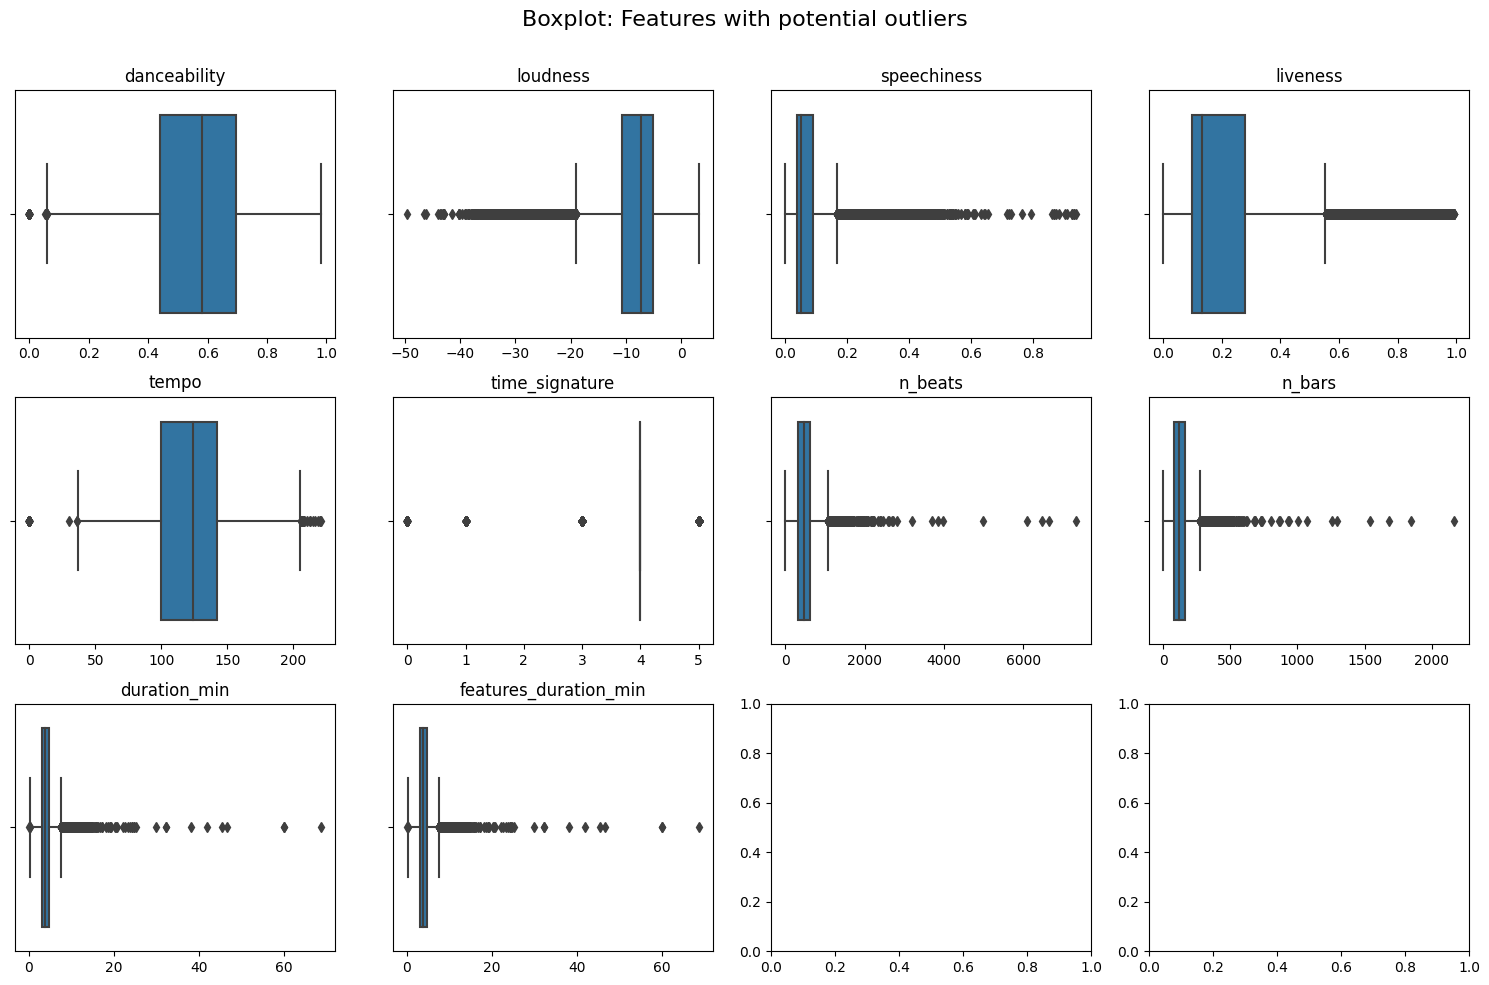

In [ ]:
features_outliers = (common_features_all_methods).to_list()

# Crea una figura con subfigure
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle("Boxplot: Features with potential outliers", fontsize=16)

# Utilizza un ciclo per creare boxplot separati per ciascuna feature
for i, feature in enumerate(features_outliers):
    row = i // 4
    col = i % 4
    sns.boxplot(x=df[feature], ax=axes[row, col])
    axes[row, col].set_title(feature)
    axes[row, col].set_xlabel("")  # Rimuovi l'etichetta x per i boxplot

# Aggiusta la disposizione delle subfigure
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Visualizza la figura
plt.show()

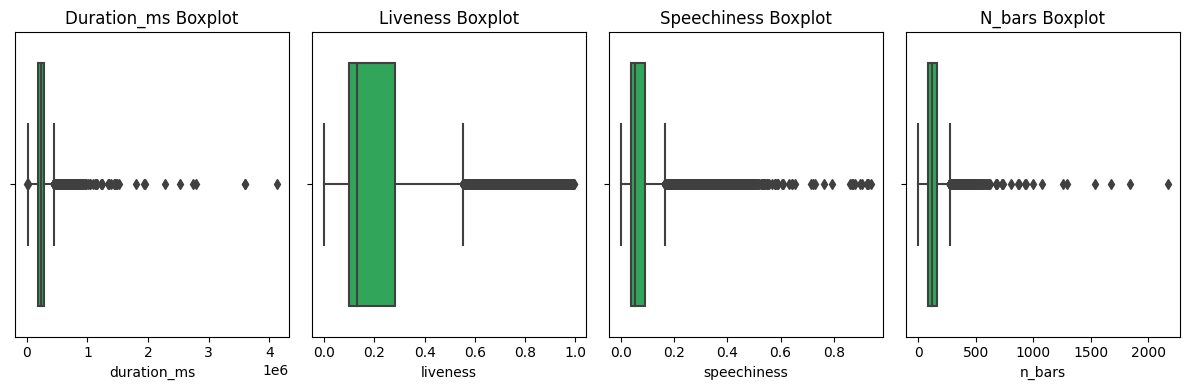

In [ ]:
# Create a subplot with one row and four columns
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

# Define the features you want to create boxplots for
features = ['duration_ms', 'liveness', 'speechiness', 'n_bars']

# Loop through each feature and create a boxplot with a specific color
for i, feature in enumerate(features):
    sns.boxplot(data=df, x=feature, ax=axes[i], color='#1DB954')
    axes[i].set_title(f"{feature.capitalize()} Boxplot")

# Update the layout for better visualization
plt.tight_layout()

# Show the figure
plt.show()

In [ ]:
# TEST: removing outliers based on the three methods

df_test_outliers = df_float[common_features_all_methods]

def remove_outliers_iqr(df, threshold=1.5):
    filtered_df = df.copy()  # Copia del DataFrame originale

    for col in df.columns:
        data = df[col]
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Rimuovi le righe contenenti outlier
        filtered_df = filtered_df.loc[(data >= lower_bound) & (data <= upper_bound)]

    return filtered_df

def remove_outliers_std(df, threshold=2):
    filtered_df = df.copy()  # Copy of the original DataFrame

    for col in df.columns:
        data = df[col]
        mean = np.mean(data)
        std = np.std(data)

        lower_bound = mean - threshold * std
        upper_bound = mean + threshold * std

        # Remove rows containing outliers
        filtered_df = filtered_df.loc[(data >= lower_bound) & (data <= upper_bound)]

    return filtered_df

def remove_outliers_combined(df, threshold_iqr=1.5, threshold_std=2):
    filtered_df_iqr = remove_outliers_iqr(df, threshold_iqr)
    filtered_df_std = remove_outliers_std(df, threshold_std)

    # Get the intersection of indices from all methods
    common_indices = filtered_df_iqr.index.intersection(filtered_df_std.index)

    return df.loc[common_indices]


original_index = df.index
filtered_df1 = remove_outliers_iqr(df_test_outliers)
filtered_df2 = remove_outliers_std(df_test_outliers)
print(f"IQR:{filtered_df1.shape}, {(1-filtered_df1.shape[0]/df.shape[0])*100:.2f}% samples cut")
print(f"stDev:{filtered_df2.shape}, {(1-filtered_df2.shape[0]/df.shape[0])*100:.2f}% samples cut")

df_test_outliers = remove_outliers_combined(df_test_outliers)
print(f"Combined:{df_test_outliers.shape}, {(1-df_test_outliers.shape[0]/df.shape[0])*100:.2f}% samples cut")

IQR:(8504, 10), 43.31% samples cut
stDev:(9902, 10), 33.99% samples cut
Combined:(8311, 10), 44.59% samples cut


In [ ]:
df_test_outliers[df_test_outliers.duration_min>50]

,danceability,loudness,speechiness,liveness,tempo,time_signature,n_beats,n_bars,duration_min,features_duration_min


### Missing values

In [ ]:
# Calculate the number of null values for each column
null_counts = df.isnull().sum()

# Calculate the percentage of null values for each column
percentage_null = (null_counts / df.shape[0]) * 100

# Create a new DataFrame to display this information
null_info = pd.DataFrame({
    "Feature": null_counts.index,
    "Null Count": null_counts.values,
    "Null Pct": percentage_null.values
})

# Define a function to format the percentage
def format_percentage(percentage):
    return f'{percentage:.2f}%'

# Apply the formatting function to the 'Null Pct' column
null_info['Null Pct'] = null_info['Null Pct'].apply(format_percentage)

# Print the result
print(null_info[null_info["Null Count"] > 0])

                  Feature  Null Count Null Pct
10                   mode        4450   29.67%
18         time_signature        2062   13.75%
21  popularity_confidence       12783   85.22%


<Axes: >

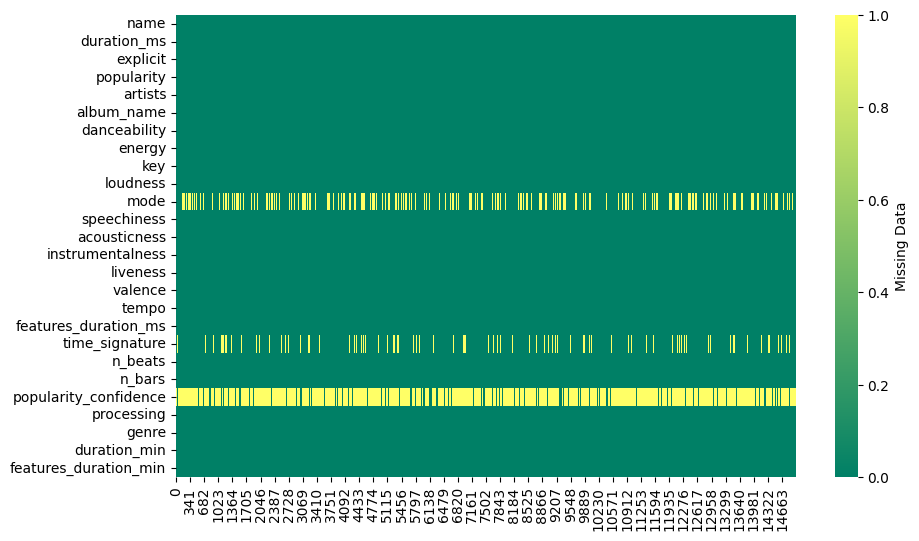

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="summer",
            cbar_kws={'label': 'Missing Data'})

#### POPULARITY_CONFIDENCE
With more than 80% missing values, then it is better to drop the column.

In [ ]:
df = df.drop("popularity_confidence", axis='columns')
print(f"New shape:{df.shape}")
print(df.columns)

New shape:(15000, 25)
Index(['name', 'duration_ms', 'explicit', 'popularity', 'artists',
       'album_name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'features_duration_ms', 'time_signature', 'n_beats',
       'n_bars', 'processing', 'genre', 'duration_min',
       'features_duration_min'],
      dtype='object')


#### TIME_SIGNATURE

In [ ]:
def float_check(df, col):
  df.dropna(subset=['time_signature'], inplace=True)

  for val in df[col]:
    if val % 1 != 0:
        return 'Ci sono dei veri float'

  return 'Tutti i float possono essere considerati come interi'

print(float_check(df.copy(), 'time_signature'))

Tutti i float possono essere considerati come interi


In [ ]:
df.loc[df['name'] == 42][['name', 'duration_ms', 'tempo', 'n_bars', 'n_beats', 'time_signature']]

,name,duration_ms,tempo,n_bars,n_beats,time_signature
42,42,353986,137.98,202.0,806.0,4.0


In [ ]:
df_ts = df.copy()

df_ts['beats_per_bar'] = 0  # Initialize 'beats_per_bar' to 0

# Check if 'tempo' and 'n_bars' are both non-zero before performing the calculation
non_zero_tempo_n_bars = (df_ts['tempo'] != 0) & (df_ts['n_bars'] != 0)

# Update 'beats_per_bar' for rows where 'tempo' and 'n_bars' are both non-zero
df_ts.loc[non_zero_tempo_n_bars, 'beats_per_bar'] = (df_ts['n_beats'] / df_ts['n_bars']).round()

df_ts.dropna(subset=['time_signature'], inplace=True)

# Calculate mean absolute error (MAE) between 'beats_per_bar' and 'time_signature'
mae = mean_absolute_error(df_ts['beats_per_bar'], df_ts['time_signature'])

# Calculate the rate of accuracy
accuracy_rate = (df_ts['beats_per_bar'] == df_ts['time_signature']).mean() * 100  # Percentage accuracy

# Count the number of rows with different values between the two columns
num_rows_with_different_values = (df_ts['beats_per_bar'] != df_ts['time_signature']).sum()

# Print the Mean Absolute Error, the accuracy rate, and the count of rows with different values
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Accuracy Rate: {accuracy_rate:.2f}%")
print(f"Number of Rows with Different Values: {num_rows_with_different_values}")

Mean Absolute Error: 0.06
Accuracy Rate: 95.90%
Number of Rows with Different Values: 531


Dato che l'accuratezza è elevata, scegliamo il calcolo come metodo di sostituzione dei valori nulli di time_signature.

Mean: 3.876178698407791
Median: 4.0
Mode: 0    4.0
Name: time_signature, dtype: float64


<Axes: xlabel='time_signature', ylabel='count'>

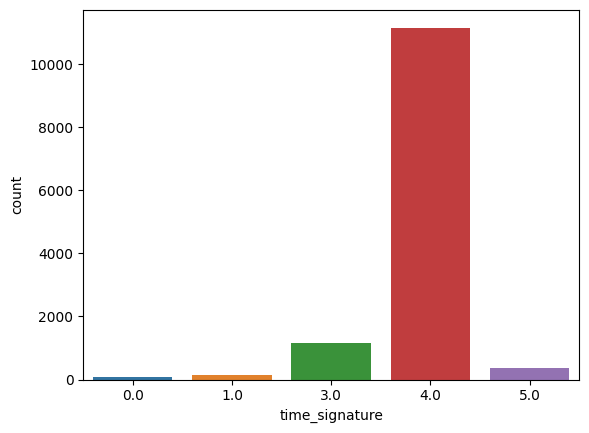

In [ ]:
print(f"Mean: {df['time_signature'].mean()}")
print(f"Median: {df['time_signature'].median()}")
print(f"Mode: {df['time_signature'].mode()}")

sns.countplot(df, x=df['time_signature'])

<Axes: xlabel='time_signature', ylabel='count'>

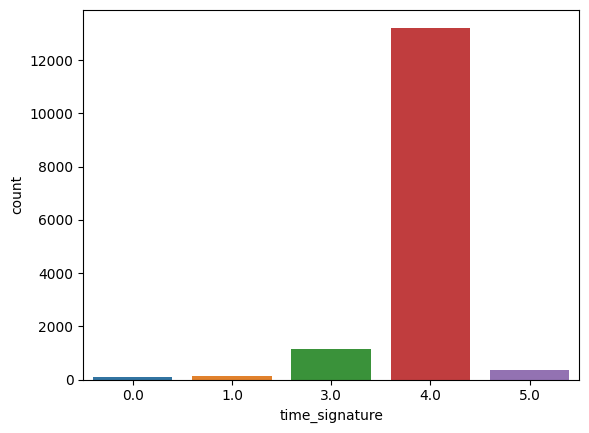

In [ ]:
# Assuming 'df' is your DataFrame
for index, row in df.iterrows():
    if pd.isna(row['time_signature']):
        if row['tempo'] != 0 and row['n_bars'] != 0:
            df.at[index, 'time_signature'] = round(row['n_beats'] / row['n_bars'])
        else:
            df.at[index, 'time_signature'] = 0

# Now, plot the countplot using seaborn
sns.countplot(data=df, x='time_signature')

In [ ]:
# Possiamo eliminare la colonna perché si può ricavare dalle altre due features

df = df.drop("time_signature", axis='columns')
print(f"New shape:{df.shape}")
print(df.columns)

New shape:(15000, 24)
Index(['name', 'duration_ms', 'explicit', 'popularity', 'artists',
       'album_name', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'features_duration_ms', 'n_beats', 'n_bars',
       'processing', 'genre', 'duration_min', 'features_duration_min'],
      dtype='object')


#### MODE

Approximately 30% of the records contain a missing value in the `mode` column: instead of rejecting these records losing part of the usable statistics, since it is a binary variable (0 minor, 1 major), we can try to replace the missing values with mode.

-> sostituzione dei valori con 1 o 0 mantenendo la percentuale.

In [ ]:
data_modeNoNull = df.dropna(subset=['mode'], axis=0)

mode_1_records = df[df['mode'] == 1].shape[0]
mode_0_records = df[df['mode'] == 0].shape[0]

print(f"FULL DATASET:{df.shape}")
print(f"Total non-null mode records: {data_modeNoNull.shape[0]}")
print(f"Records with mode 1: {mode_1_records / data_modeNoNull.shape[0]:.2%}")
print(f"Records with mode 0: {mode_0_records / data_modeNoNull.shape[0]:.2%}")

FULL DATASET:(15000, 24)
Total non-null mode records: 10550
Records with mode 1: 63.14%
Records with mode 0: 36.86%


In [ ]:
percent_1 = mode_1_records / data_modeNoNull.shape[0]
percent_0 = mode_0_records / data_modeNoNull.shape[0]

null_count_mode = df['mode'].isnull().sum()

# Number of 1 e 0 that we must generate for missing values
count_1 = int(null_count_mode * (percent_1 / 100))
count_0 = null_count_mode - count_1

# Genera un array di valori casuali 1 e 0 basati sulle percentuali
random_values = np.random.choice([1, 0], size=null_count_mode, p=[percent_1, percent_0])

# Sostituisci i valori nulli nella colonna 'mode' con i valori generati casualmente
df.loc[df['mode'].isnull(), 'mode'] = random_values

<Axes: xlabel='mode', ylabel='count'>

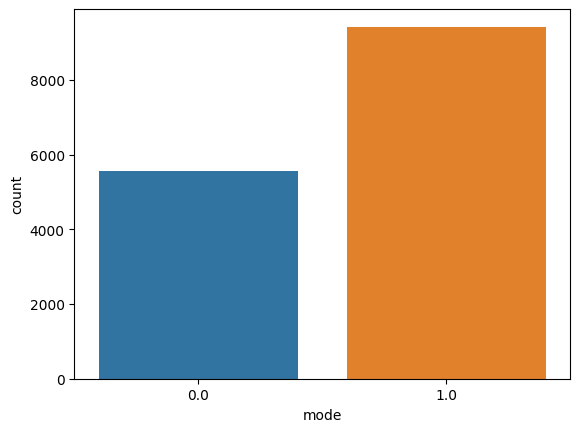

In [ ]:
sns.countplot(df, x=df['mode'])

In [ ]:
mode_1_records = df[df['mode'] == 1].shape[0]
mode_0_records = df[df['mode'] == 0].shape[0]

print(f"Total non-null mode records: {df.dropna(subset=['mode'], axis=0).shape[0]}")
print(f"Records with mode 1: {mode_1_records / df.shape[0]:.2%}")
print(f"Records with mode 0: {mode_0_records / df.shape[0]:.2%}")

Total non-null mode records: 15000
Records with mode 1: 62.84%
Records with mode 0: 37.16%


In [ ]:
df['mode'] = [int(x) for x in df['mode']] # float->int (binary)

#### Check

In [ ]:
# Calculate the number of null values for each column
null_counts_post = df.isnull().sum()

# Calculate the percentage of null values for each column
percentage_null_post = (null_counts_post / df.shape[0]) * 100

# Create a new DataFrame to display this information
null_info_post = pd.DataFrame({
    "Feature": null_counts_post.index,
    "Null Count": null_counts_post.values,
    "Null Pct": percentage_null_post.values
})

# Apply the formatting function to the 'Null Pct' column
null_info_post['Null Pct'] = null_info_post['Null Pct'].apply(format_percentage)

# Print the result
print(null_info_post[null_info_post["Null Count"] > 0])

Empty DataFrame
Columns: [Feature, Null Count, Null Pct]
Index: []


Dopo aver controllato che tutti i valori nulli siano stati sostituiti, possiamo applicare le modifiche al dataset originale.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   15000 non-null  int64  
 1   duration_ms            15000 non-null  int64  
 2   explicit               15000 non-null  int64  
 3   popularity             15000 non-null  int64  
 4   artists                15000 non-null  int64  
 5   album_name             15000 non-null  int64  
 6   danceability           15000 non-null  float64
 7   energy                 15000 non-null  float64
 8   key                    15000 non-null  int64  
 9   loudness               15000 non-null  float64
 10  mode                   15000 non-null  int64  
 11  speechiness            15000 non-null  float64
 12  acousticness           15000 non-null  float64
 13  instrumentalness       15000 non-null  float64
 14  liveness               15000 non-null  float64
 15  va

## Dependencies or correlations

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   15000 non-null  int64  
 1   duration_ms            15000 non-null  int64  
 2   explicit               15000 non-null  int64  
 3   popularity             15000 non-null  int64  
 4   artists                15000 non-null  int64  
 5   album_name             15000 non-null  int64  
 6   danceability           15000 non-null  float64
 7   energy                 15000 non-null  float64
 8   key                    15000 non-null  int64  
 9   loudness               15000 non-null  float64
 10  mode                   15000 non-null  int64  
 11  speechiness            15000 non-null  float64
 12  acousticness           15000 non-null  float64
 13  instrumentalness       15000 non-null  float64
 14  liveness               15000 non-null  float64
 15  va

In [ ]:
'''plt.figure(figsize=(15,15))
sns.pairplot(data=df.drop(name_vars,axis=1))
plt.show()'''

'plt.figure(figsize=(15,15))\nsns.pairplot(data=df.drop(name_vars,axis=1))\nplt.show()'

### Spearman correlation

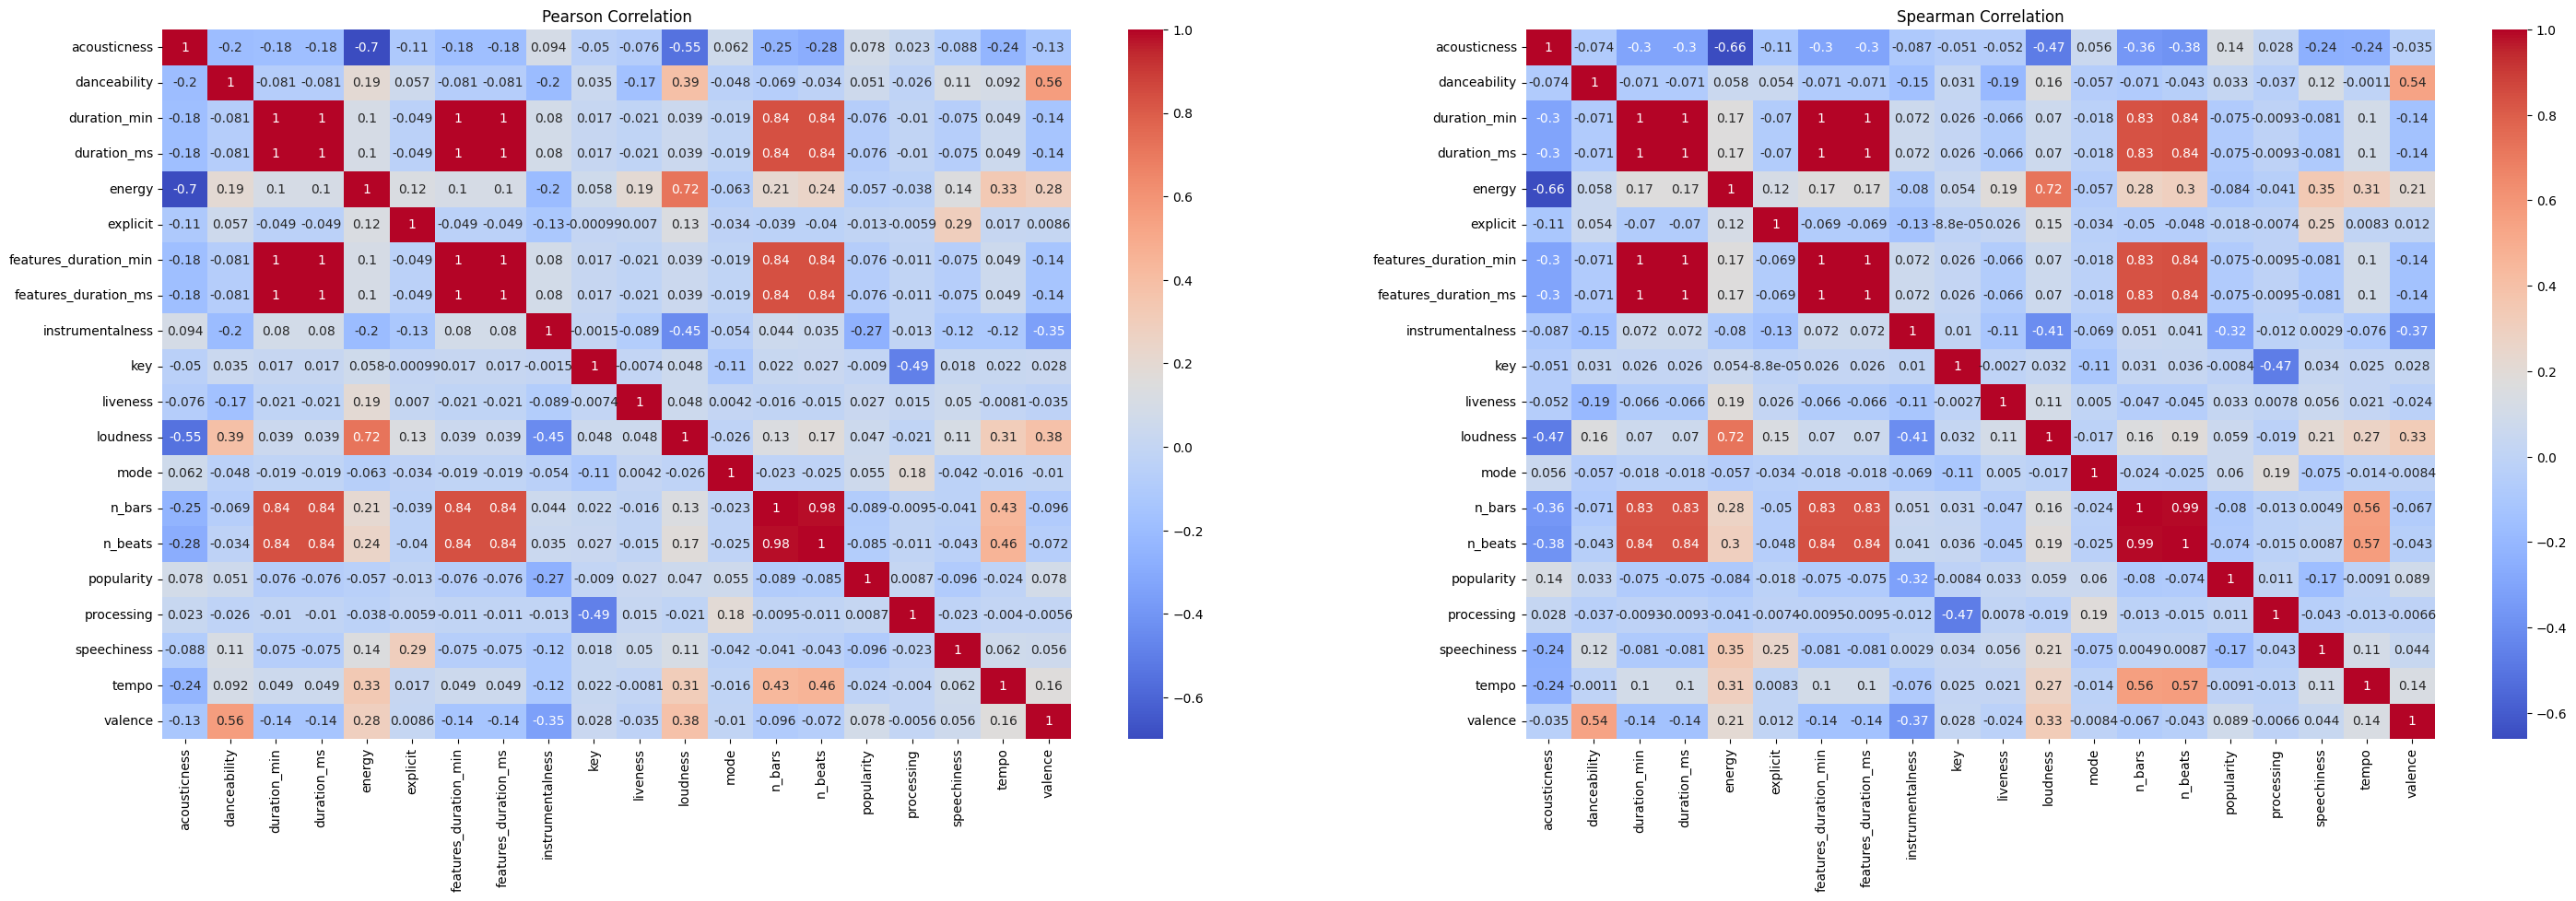

In [ ]:
df_numeric = df[df.columns.difference(['name', 'album_name', 'artists', 'genre'])]

correlation_pearson = df_numeric.corr(method='pearson', numeric_only=True)
correlation_spearman = df_numeric.corr(method='spearman', numeric_only=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(35, 10))

# Heatmap Pearson
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm', ax=ax1)
ax1.set_title('Pearson Correlation')

# Heatmap Spearman
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', ax=ax2)
ax2.set_title('Spearman Correlation')

plt.show()

In [ ]:
df = df.drop(['duration_ms','features_duration_ms'], axis='columns')
print(f"New shape:{df.shape}")
print(df.columns)

New shape:(15000, 22)
Index(['name', 'explicit', 'popularity', 'artists', 'album_name',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'n_beats', 'n_bars', 'processing', 'genre', 'duration_min',
       'features_duration_min'],
      dtype='object')


In [ ]:
df_numeric = df.copy()
df_numeric = df_numeric[df_numeric.columns.difference(['name', 'album_name', 'artists', 'genre'])]

correlation_spearman = df_numeric.corr(method='spearman', numeric_only=True)

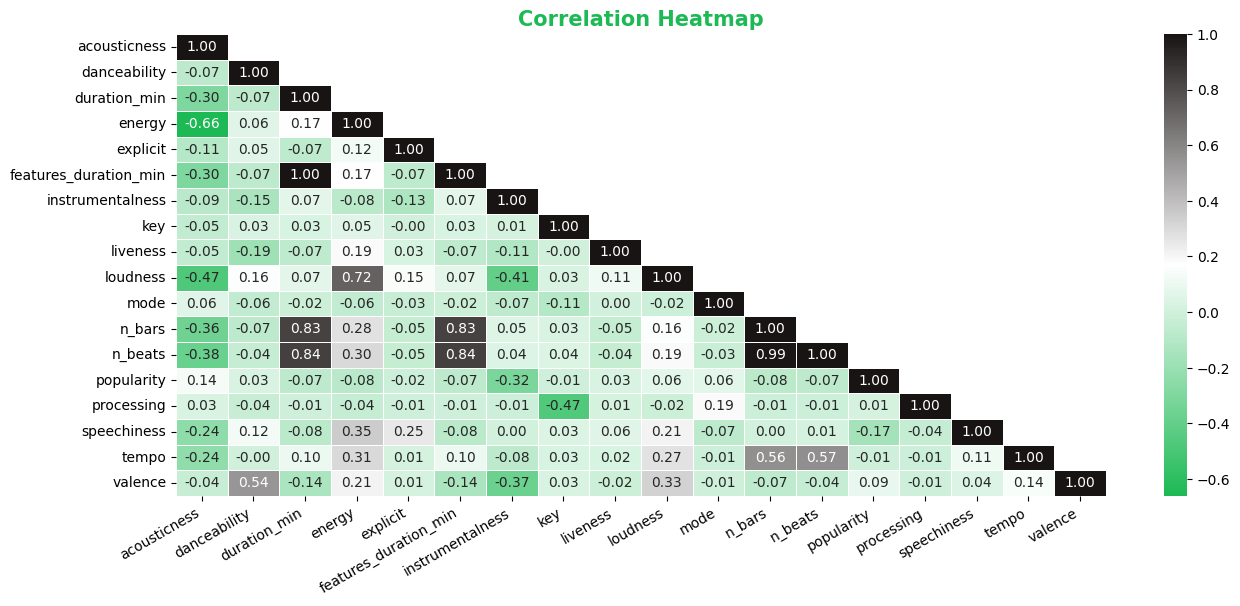

In [ ]:
# Crea una maschera per il triangolo superiore
mask = np.triu(np.ones_like(correlation_spearman), k=1)

fig, ax = plt.subplots(figsize=(15, 6))

colors = [(0, '#1DB954'), (0.5, 'white'), (1, '#191414')]
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Applica la maschera alla heatmap
heatmap = sns.heatmap(correlation_spearman, annot=True, cmap=cmap, linewidth=.5, mask=mask, fmt='.2f', ax=ax)
ax.set_title('Correlation Heatmap', fontweight='bold', color='#1DB954', fontsize=15)

# Ruota le etichette sull'asse x di 30 gradi e allineale a destra
plt.xticks(rotation=30, ha='right')

plt.show()

In [ ]:
df = df.drop(['features_duration_min'], axis='columns')
print(f"New shape:{df.shape}")
print(df.columns)

New shape:(15000, 21)
Index(['name', 'explicit', 'popularity', 'artists', 'album_name',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'n_beats', 'n_bars', 'processing', 'genre', 'duration_min'],
      dtype='object')


In [ ]:
correlation_spearman

,acousticness,danceability,duration_min,energy,explicit,features_duration_min,instrumentalness,key,liveness,loudness,mode,n_bars,n_beats,popularity,processing,speechiness,tempo,valence
acousticness,1.000000,-0.074124,-0.300618,-0.660646,-0.108712,-0.300589,-0.087309,-0.051355,-0.052367,-0.472642,0.056320,-0.356738,-0.377161,0.136811,0.028365,-0.240004,-0.238728,-0.035021
danceability,-0.074124,1.000000,-0.071248,0.057548,0.054032,-0.071164,-0.146790,0.031229,-0.190882,0.159135,-0.056831,-0.070965,-0.042866,0.032507,-0.037003,0.124519,-0.001113,0.540504
duration_min,-0.300618,-0.071248,1.000000,0.172889,-0.069506,0.999949,0.071912,0.025587,-0.066468,0.069907,-0.018446,0.832873,0.840275,-0.074721,-0.009319,-0.080987,0.100555,-0.141589
energy,-0.660646,0.057548,0.172889,1.000000,0.121567,0.172858,-0.079978,0.053744,0.185379,0.721253,-0.057159,0.277468,0.299764,-0.084054,-0.040530,0.345056,0.305285,0.213546
explicit,-0.108712,0.054032,-0.069506,0.121567,1.000000,-0.069486,-0.130814,-0.000088,0.026044,0.147646,-0.033742,-0.049747,-0.048132,-0.018375,-0.007353,0.252774,0.008268,0.012278
features_duration_min,-0.300589,-0.071164,0.999949,0.172858,-0.069486,1.000000,0.071950,0.025574,-0.066466,0.069908,-0.018461,0.832824,0.840224,-0.074753,-0.009450,-0.080872,0.100527,-0.141660
instrumentalness,-0.087309,-0.146790,0.071912,-0.079978,-0.130814,0.071950,1.000000,0.010442,-0.113257,-0.406914,-0.068523,0.050822,0.040665,-0.315345,-0.012133,0.002922,-0.076378,-0.372487
key,-0.051355,0.031229,0.025587,0.053744,-0.000088,0.025574,0.010442,1.000000,-0.002663,0.031967,-0.107858,0.031222,0.035934,-0.008435,-0.472067,0.033542,0.025185,0.028213
liveness,-0.052367,-0.190882,-0.066468,0.185379,0.026044,-0.066466,-0.113257,-0.002663,1.000000,0.111091,0.004957,-0.046692,-0.044600,0.033195,0.007837,0.056404,0.020939,-0.024321
loudness,-0.472642,0.159135,0.069907,0.721253,0.147646,0.069908,-0.406914,0.031967,0.111091,1.000000,-0.017184,0.162647,0.186432,0.059463,-0.018809,0.210942,0.273406,0.327016


### PCA (continuous variables)

In [ ]:
filtered_data_continuous = df[df.columns.difference(['name', 'album_name', 'artists', 'genre'])]
numeric_data = filtered_data_continuous.select_dtypes(include=[np.number])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_data)

df_scaled_dataframe = pd.DataFrame(data=df_scaled,
                                columns=numeric_data.columns)

df_scaled_dataframe.head(5)

,acousticness,danceability,duration_min,energy,explicit,instrumentalness,key,liveness,loudness,mode,n_bars,n_beats,popularity,processing,speechiness,tempo,valence
0,-0.005753,0.715310,-0.039437,-0.541799,-0.26236,0.650965,-0.080300,0.328795,-0.605102,0.768988,0.167839,0.232071,0.999431,-0.758998,0.158245,0.598325,0.714789
1,-0.063412,-2.481888,1.540689,-1.740911,-0.26236,1.690353,-1.196090,0.733324,-2.648529,-1.300410,0.354228,0.410209,-1.475429,0.138354,-0.037820,-1.488278,-1.454678
2,-0.921953,-0.968238,0.677386,0.748097,-0.26236,1.340409,-0.917142,0.231503,0.241441,-1.300410,0.447423,0.534906,-1.314025,1.237725,-0.508373,-0.203212,0.188115
3,-0.720722,-0.144484,0.179643,-0.269446,-0.26236,-0.745497,-0.080300,-0.510988,0.547489,0.768988,0.354228,0.417335,-0.237999,-0.758998,-0.083952,0.556327,-0.187051
4,-0.920476,0.473332,0.475378,0.116388,-0.26236,-0.495757,0.477595,0.420966,-0.407120,0.768988,0.727008,0.823490,-0.130396,1.540059,-0.344602,0.652663,0.722004


In [ ]:
pca = PCA(n_components=10, random_state=42)

pca.fit_transform(df_scaled)

prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

PC_numbers = np.arange(pca.n_components_) + 1

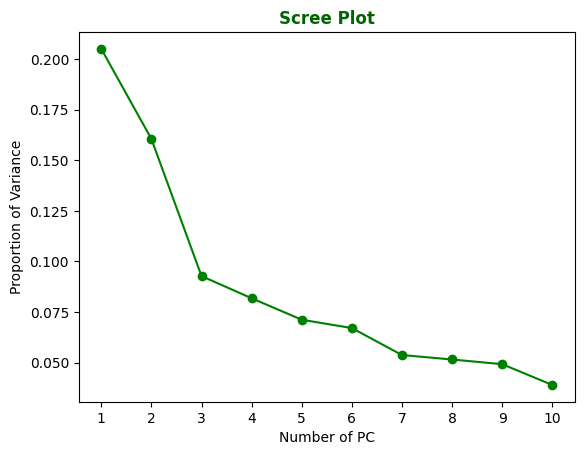

In [ ]:
plt.plot(PC_numbers, prop_var,'go-')
plt.title('Scree Plot', fontsize=12, fontweight='bold', color = 'darkgreen')
plt.xlabel('Number of PC', fontsize=10)
plt.ylabel('Proportion of Variance', fontsize=10)
plt.xticks(PC_numbers)
plt.show()

Assuming the first 3 components should retain considering the elbow rule, we can rerun the PCA and interpret the results for the first three components. We will transform our variables into the principal components using the PCA algorithm of sklearn.decomposition. Afterward, we can visualize our results in a biplot for statistical inference.

In [ ]:
pca = PCA(n_components=3, random_state=42)
PC = pca.fit_transform(df_scaled)
pca_continuous = pd.DataFrame(data = PC, columns = ['PC1', 'PC2', 'PC3'])

pca_continuous.head(5)

,PC1,PC2,PC3
0,-0.013517,0.042928,-0.030799
1,-2.024912,4.216103,-0.249816
2,0.935193,1.188981,0.588630
3,0.904950,0.113230,-0.030982
4,1.370260,0.275963,1.193365


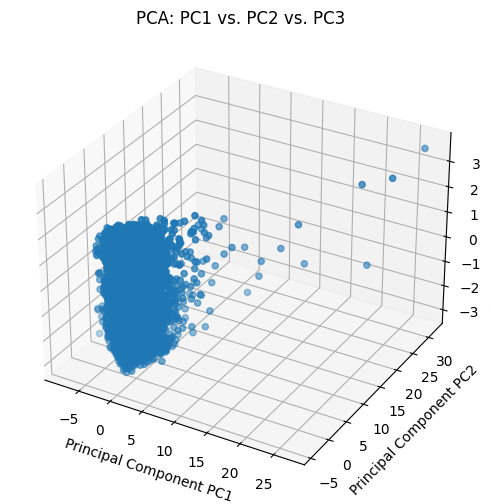

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_continuous['PC1'], pca_continuous['PC2'], pca_continuous['PC3'])
ax.set_xlabel('Principal Component PC1')
ax.set_ylabel('Principal Component PC2')
ax.set_zlabel('Principal Component PC3')

plt.title('PCA: PC1 vs. PC2 vs. PC3')
plt.show()

In [ ]:
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=numeric_data.columns, index=['PC1', 'PC2', 'PC3'])
loadings_df = loadings_df.round(2)
loadings_df.T

,PC1,PC2,PC3
acousticness,-0.36,0.14,0.04
danceability,0.15,-0.33,0.00
duration_min,0.31,0.39,0.02
energy,0.39,-0.23,-0.02
explicit,0.06,-0.14,-0.05
instrumentalness,-0.14,0.31,-0.15
key,0.05,-0.03,-0.62
liveness,0.03,-0.03,0.03
loudness,0.36,-0.33,0.04
mode,-0.04,0.01,0.36


Here is a brief explanation of the main operations performed in the code:

- Select continuous variables: A subset of the dataframe df containing only continuous variables is selected.
- Data Standardization: Continuous variables are standardized using scikit-learn's StandardScaler. Standardization is important in PCA because it ensures that all variables have the same scale.
- PCA calculation with 10 principal components: A PCA object with 10 principal components (n_components=10) is created and then trained on standardized data using the fit_transform method.
- Calculation of explained variance: The variance explained by each of the principal components is calculated. This is done with pca.explained_variance_ratio_ and pca.explained_variance_.
- Scree Plot: A scree plot is created to display the variance explained by each principal component. This can help identify the point at which the explained variance begins to saturate (the elbow point), which can be used to determine how many principal components to retain.
- Repeat PCA with 3 principal components: After identifying that the first 3 principal components explain a significant amount of the variance (based on the scree plot), a new instance of PCA with n_components=3 is created and trained on the standardized data.
- Dataframe creation for principal components: PCA results are entered into a dataframe called pca_continuous, with columns named "PC1," "PC2," and "PC3."
- Calculation of principal component loads: The principal component loads (or weights) of the original variables are stored in the loadings variable. These loadings indicate how much each variable contributes to each of the first three principal components.
- Creating a dataframe for principal component loads: The principal component loadings are entered into a dataframe called loadings_df, which shows how each original variable is related to each of the first three principal components.


This procedure allows you to perform a PCA, identify the appropriate number of principal components to store, and interpret the results, including the principal component loadings showing how the original variables are affected by each principal component. This is an important step in understanding and analyzing your data.

In [ ]:
df = df.drop(['n_beats'], axis='columns') # can be expressed as duration_min*tempo

## Normalization

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              15000 non-null  int64  
 1   explicit          15000 non-null  int64  
 2   popularity        15000 non-null  int64  
 3   artists           15000 non-null  int64  
 4   album_name        15000 non-null  int64  
 5   danceability      15000 non-null  float64
 6   energy            15000 non-null  float64
 7   key               15000 non-null  int64  
 8   loudness          15000 non-null  float64
 9   mode              15000 non-null  int64  
 10  speechiness       15000 non-null  float64
 11  acousticness      15000 non-null  float64
 12  instrumentalness  15000 non-null  float64
 13  liveness          15000 non-null  float64
 14  valence           15000 non-null  float64
 15  tempo             15000 non-null  float64
 16  n_bars            15000 non-null  float6

In [ ]:
name_vars = ['name', 'artists', 'album_name']

continuous_vars = [
    'duration_min', 'popularity', 'danceability',
    'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'n_bars', 'processing'
 ]

categorical_vars = ['key', 'mode', 'explicit', 'genre']

features_list = continuous_vars + categorical_vars

In [ ]:
df.to_csv('/content/drive/MyDrive/UNIPI/DM1/DATASET: Spotify/DM1 - Project/files/dm1_df_understanding_NOTSCALED.csv', index=False)

In [ ]:
# StandardScaler (Z-Score)

# Create a StandardScaler object
scaler = StandardScaler()

# Select float columns
features_list.remove('explicit') # removing binary features before scaling
features_list.remove('mode')
columns = features_list

# Fit and transform the columns
df[columns] = scaler.fit_transform(df[columns])

from joblib import dump, load
# Save the scaler
dump(scaler, 'scaler_preprocessing_DM1Spotify2324.joblib')

'''
# Later in another Python session, you can load it
scaler = load('scaler.joblib')

# And use it to transform new data
new_data_transformed = scaler.transform(new_data)
'''

"\n# Later in another Python session, you can load it\nscaler = load('scaler.joblib')\n\n# And use it to transform new data\nnew_data_transformed = scaler.transform(new_data)\n"

In [ ]:
df.head()

,name,explicit,popularity,artists,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,n_bars,processing,genre,duration_min
0,0,0,0.999431,0,0,0.715310,-0.541799,-0.080300,-0.605102,1,0.158245,-0.005753,0.650965,0.328795,0.714789,0.598325,0.167839,-0.758998,-1.647509,-0.039437
1,1,0,-1.475429,1,1,-2.481888,-1.740911,-1.196090,-2.648529,0,-0.037820,-0.063412,1.690353,0.733324,-1.454678,-1.488278,0.354228,0.138354,-1.474087,1.540689
2,2,0,-1.314025,2,2,-0.968238,0.748097,-0.917142,0.241441,0,-0.508373,-0.921953,1.340409,0.231503,0.188115,-0.203212,0.447423,1.237725,-1.300665,0.677386
3,3,0,-0.237999,3,3,-0.144484,-0.269446,-0.080300,0.547489,1,-0.083952,-0.720722,-0.745497,-0.510988,-0.187051,0.556327,0.354228,-0.758998,-1.127243,0.179643
4,4,0,-0.130396,4,4,0.473332,0.116388,0.477595,-0.407120,1,-0.344602,-0.920476,-0.495757,0.420966,0.722004,0.652663,0.727008,1.540059,-0.953821,0.475378


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
name,15000.0,7.499500e+03,4330.271354,0.000000,3749.750000,7499.500000,11249.250000,14999.000000
explicit,15000.0,6.440000e-02,0.245472,0.000000,0.000000,0.000000,0.000000,1.000000
popularity,15000.0,4.736952e-17,1.000033,-1.475429,-0.722211,-0.184198,0.784226,3.581893
artists,15000.0,1.987648e+03,1755.410934,0.000000,486.000000,1437.000000,3178.000000,6256.000000
album_name,15000.0,4.084496e+03,2832.826566,0.000000,1569.750000,3673.000000,6399.000000,9819.000000
danceability,15000.0,-4.106937e-16,1.000033,-2.837132,-0.566658,0.148979,0.741053,2.208366
energy,15000.0,1.080025e-16,1.000033,-2.482318,-0.666628,0.199607,0.861578,1.300369
key,15000.0,-7.200166e-17,1.000033,-1.475037,-0.917142,-0.080300,0.756543,1.593386
loudness,15000.0,-8.668621e-17,1.000033,-6.766353,-0.289938,0.265086,0.631744,2.006627
mode,15000.0,6.284000e-01,0.483248,0.000000,0.000000,1.000000,1.000000,1.000000


# Export

In [ ]:
df.to_csv('/content/drive/MyDrive/UNIPI/DM1/DATASET: Spotify/DM1 - Project/files/dm1_df_understanding.csv', index=False)